In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import librosa 
import librosa.display
import IPython.display as ipd
import os 
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
from tqdm import tqdm

In [2]:
audio_dataframe = pd.read_csv('label_dataframe.csv') 
audio_dataframe.head()

file_name     label  instrument type_of_sound root_note chord_type
0  0000.wav     C:maj  non_guitar    Jazz_Organ         C        maj
1  0001.wav   C:maj/3  non_guitar    Jazz_Organ         C      maj/3
2  0002.wav   C:maj/5  non_guitar    Jazz_Organ         C      maj/5
3  0003.wav    C#:maj  non_guitar    Jazz_Organ        C#        maj
4  0004.wav  C#:maj/3  non_guitar    Jazz_Organ        C#      maj/3

In [3]:
def plot_histogram(data_frame, title, x_label, y_label):
    """
    Plot a histogram of the given data frame.

    Parameters:
    data_frame (pandas.DataFrame): The data frame containing the data to be plotted.
    title (str): The title of the histogram.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    """
    plt.figure(figsize=(16, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(data_frame.unique())))
    ax = data_frame.value_counts().plot(kind='bar', color=colors)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    plt.show()


In [ ]:
plot_histogram(audio_dataframe['instrument'], 'Instrument Distribution', 'Instrument', 'Count') 
plot_histogram(audio_dataframe['type_of_sound'], 'Type of Sound Distribution', 'Type of Sound', 'Count')
plot_histogram(audio_dataframe['root_note'], 'Root Note Distribution', 'Root Note', 'Count')
plot_histogram(audio_dataframe['chord_type'], 'Chord Type Distribution', 'Chord Type', 'Count')

In [3]:
n_chroma=12 # Number of pitches (C, C#, D, D#, ... B)
n_octaves=7 # Number of octaves used in the analysis
hop_length = int(44.1e3*2)

def plot_chromagram(audio_file, n_chroma=12, n_octaves=7, hop_length=int(44.1e3*2)):
    """
    Plot the chromagram of an audio file.

    Parameters:
    audio_file (str): The path to the audio file.

    Returns:
    None
    """

    x, sr = librosa.load(audio_file, sr=None)
    chromagram = librosa.feature.chroma_cqt(y=x, sr=sr, n_chroma=n_chroma, n_octaves=n_octaves, hop_length=hop_length)
    print(chromagram.shape)
    plt.figure(figsize=(16, 6))
    plt.imshow(chromagram, origin='lower', aspect='auto', cmap='hot')
    plt.title(f'Chromagram {os.path.split(audio_file)[-1].split(".")[0]}')
    plt.xlabel('Time')
    plt.ylabel('Pitch Class')
    plt.colorbar()

def save_chromagram(audio_file, n_chroma=12, n_octaves=7, hop_length=int(44.1e3*2)):
    """
    Save the chromagram of an audio file.

    Parameters:
    audio_file (str): The path to the audio file.

    Returns:
    None
    """

    x, sr = librosa.load(audio_file, sr=None)
    chromagram = librosa.feature.chroma_cqt(y=x, sr=sr, n_chroma=n_chroma, n_octaves=n_octaves, hop_length=hop_length+1)
    np.save(os.path.split('IDMT-SMT-CHORDS/chromagrams/'+ audio_file)[-1].split(".")[0] + "_chromagram.npy", chromagram)

In [6]:
for dir_path, _, filenames in tqdm(os.walk('trimmed_audio')):
    for file_name in filenames:
        save_chromagram(dir_path + '/' + file_name)
        plt.show()

1it [1:43:08, 6188.32s/it]


(12, 577)


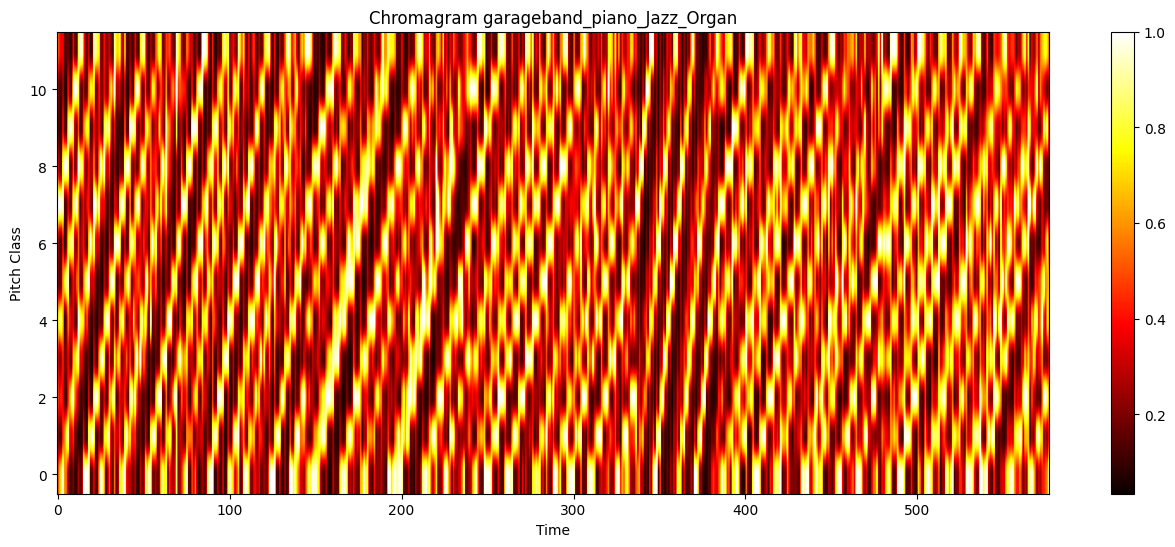

(12, 577)


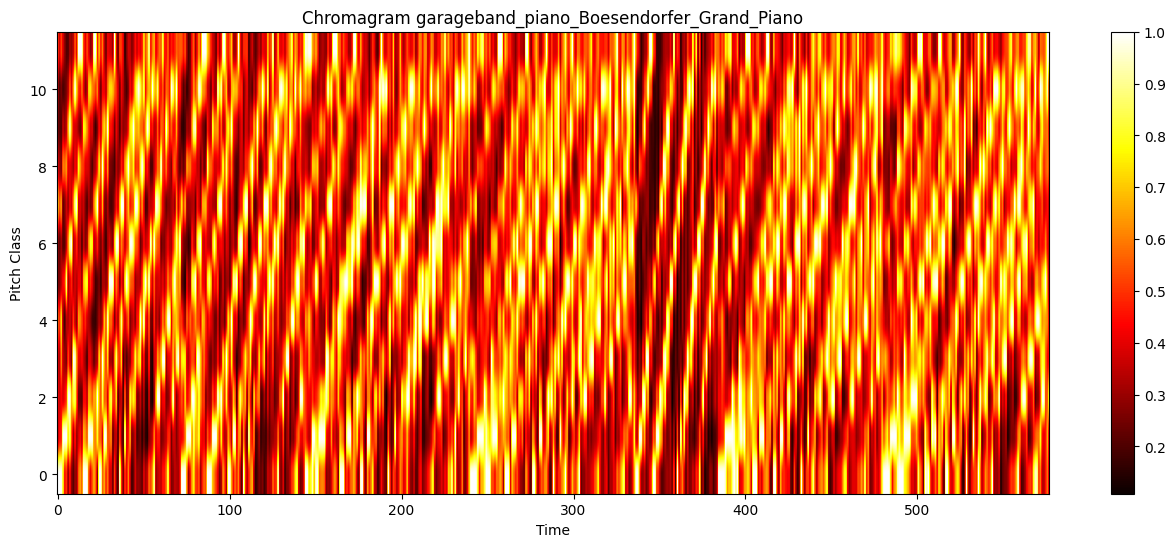

(12, 577)


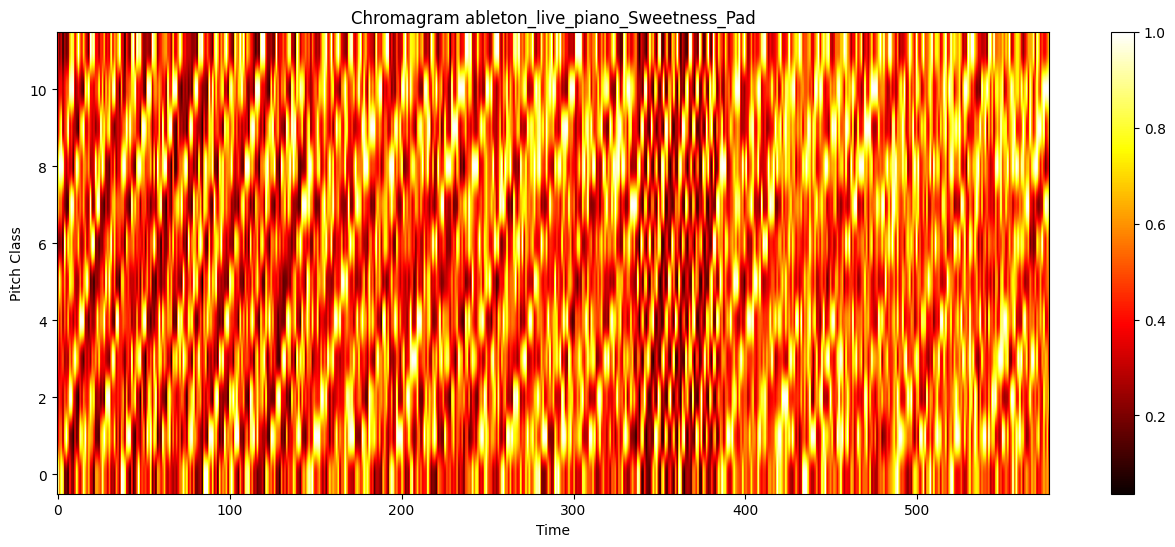

(12, 274)


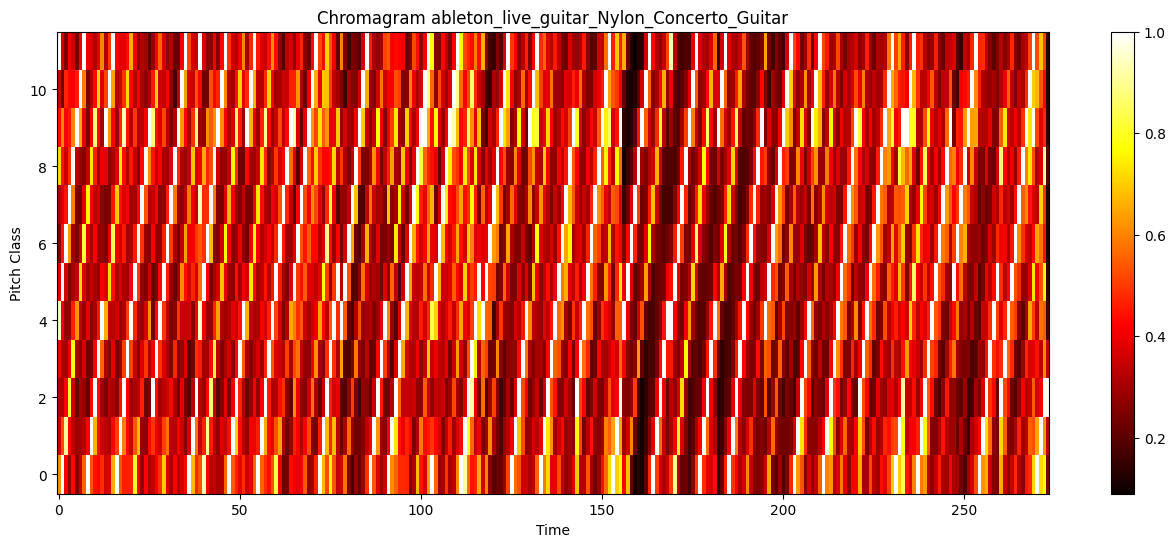

(12, 274)


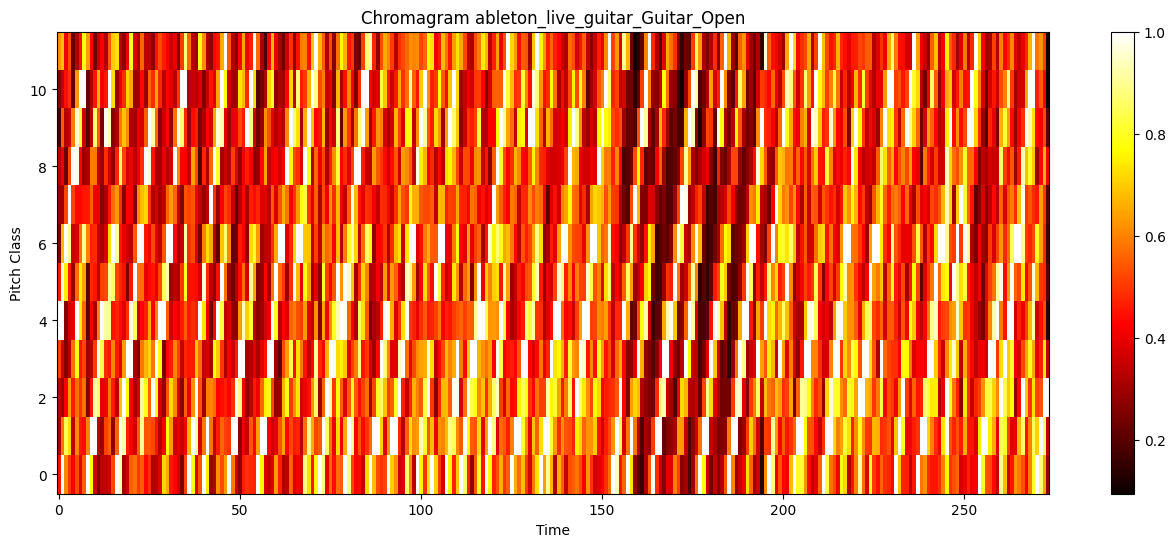

(12, 274)


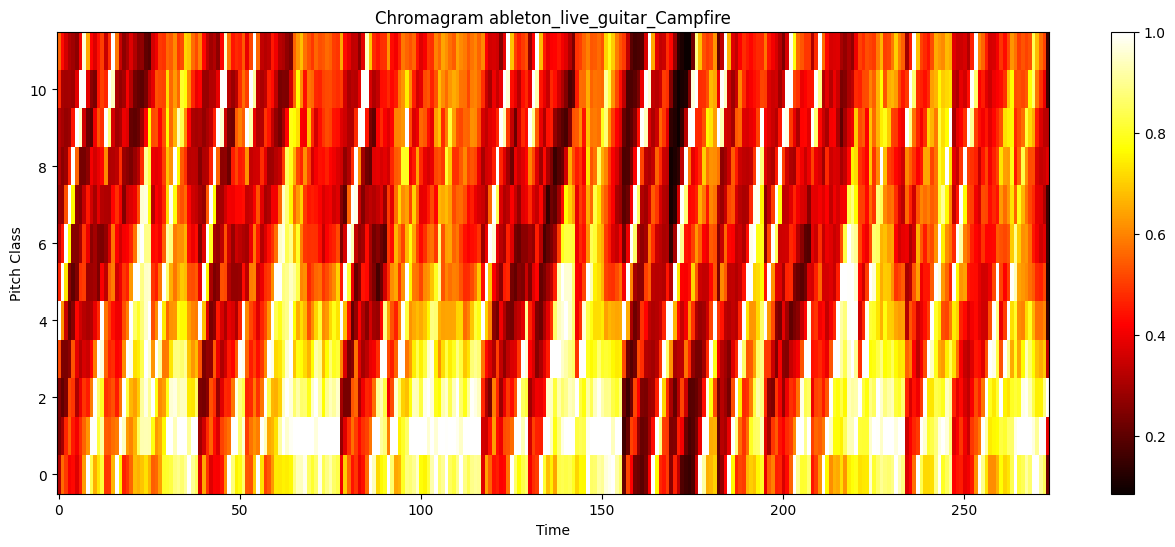

(12, 577)


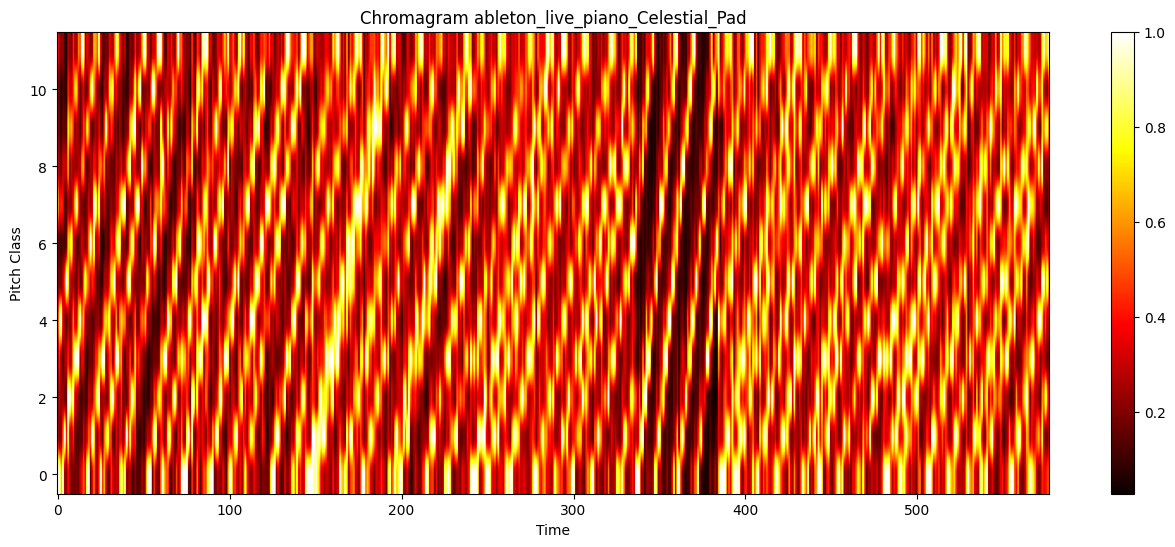

(12, 577)


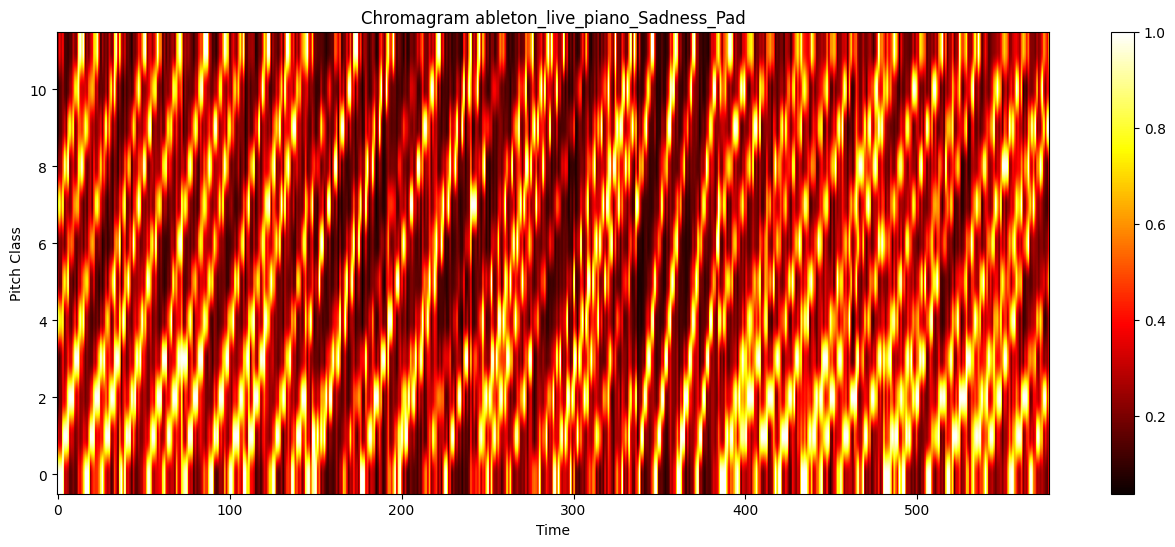

(12, 577)


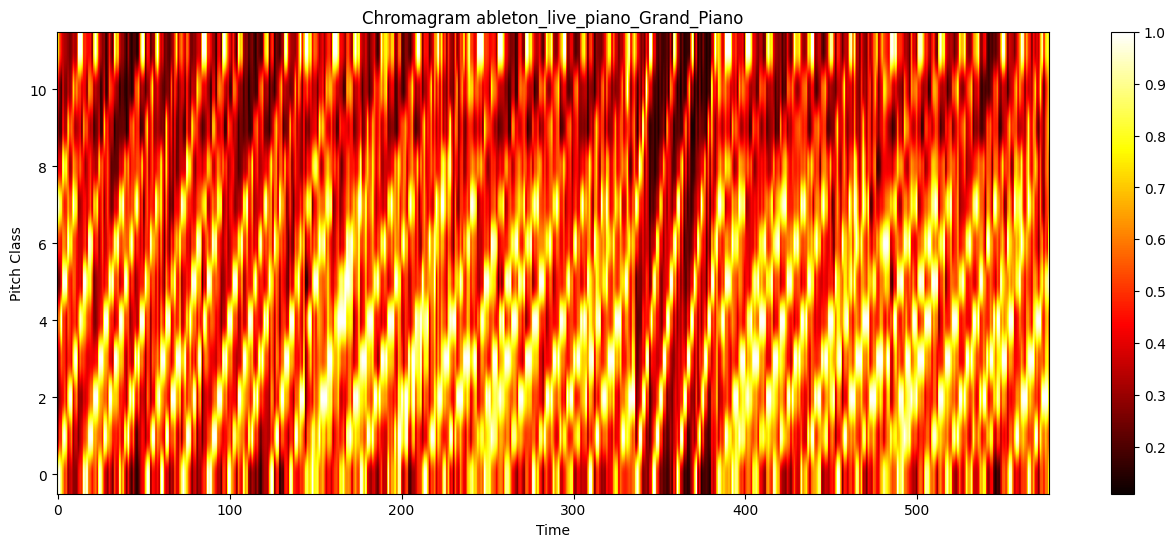

(12, 274)


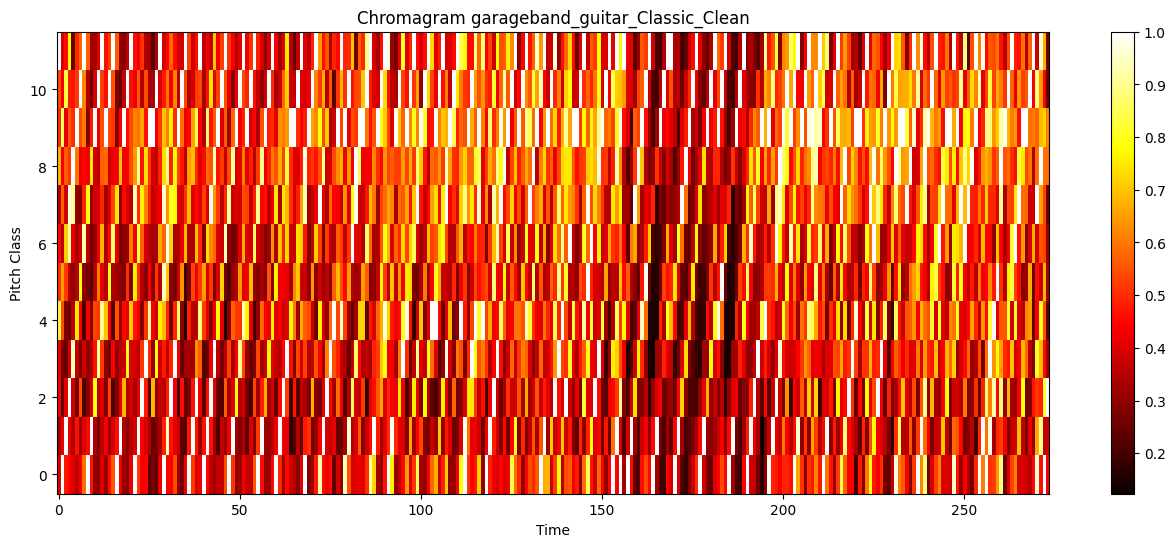

(12, 274)


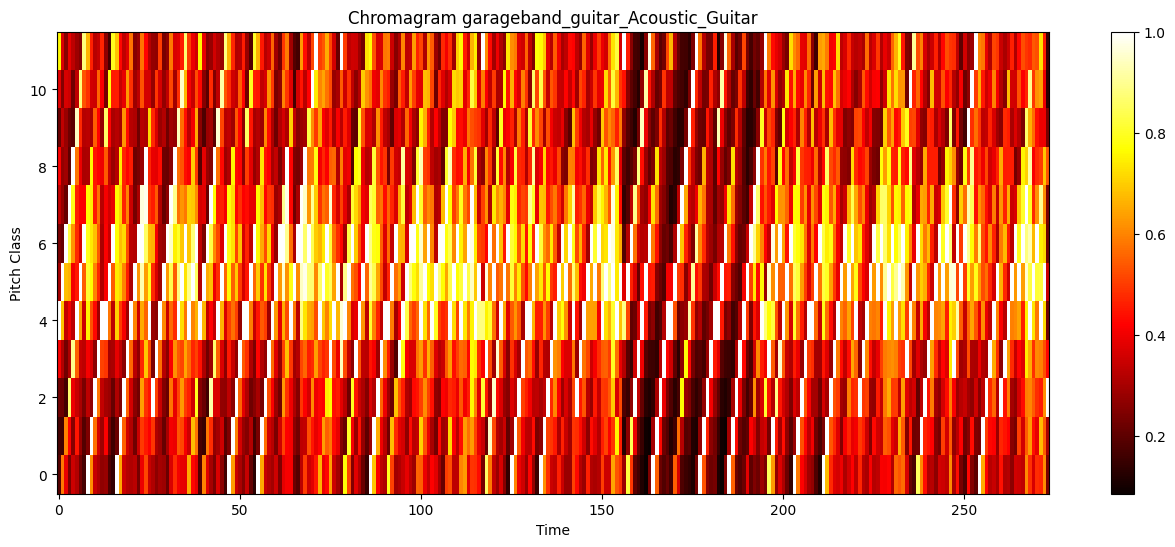

(12, 274)


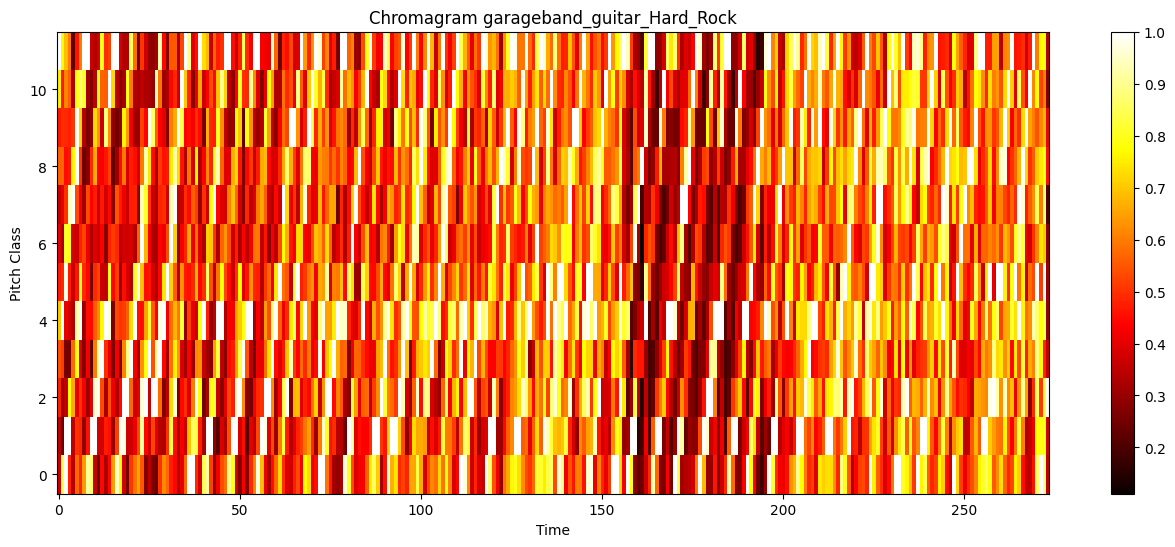

(12, 577)


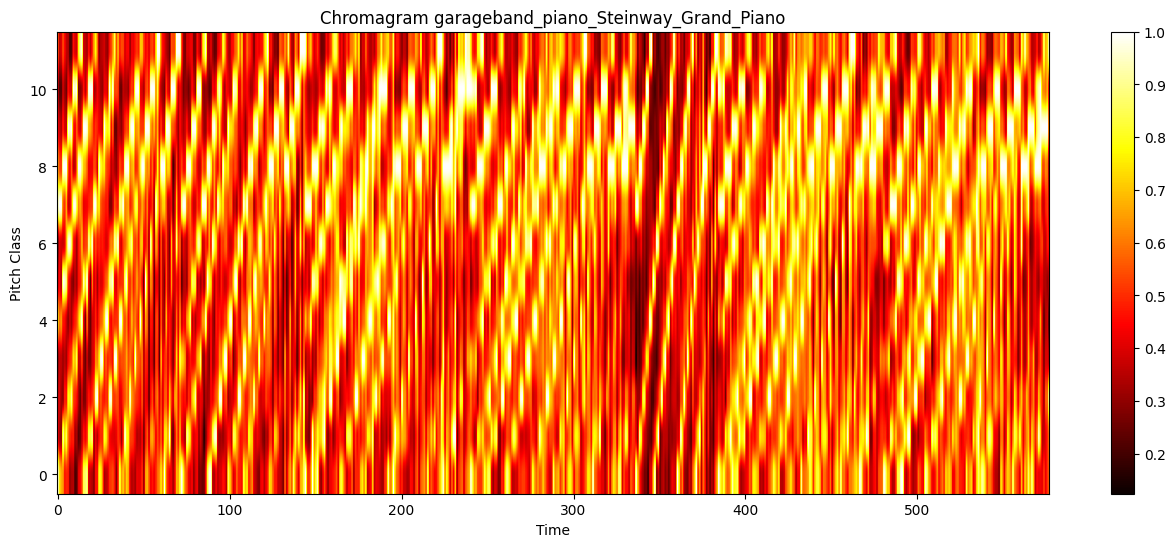

(12, 577)


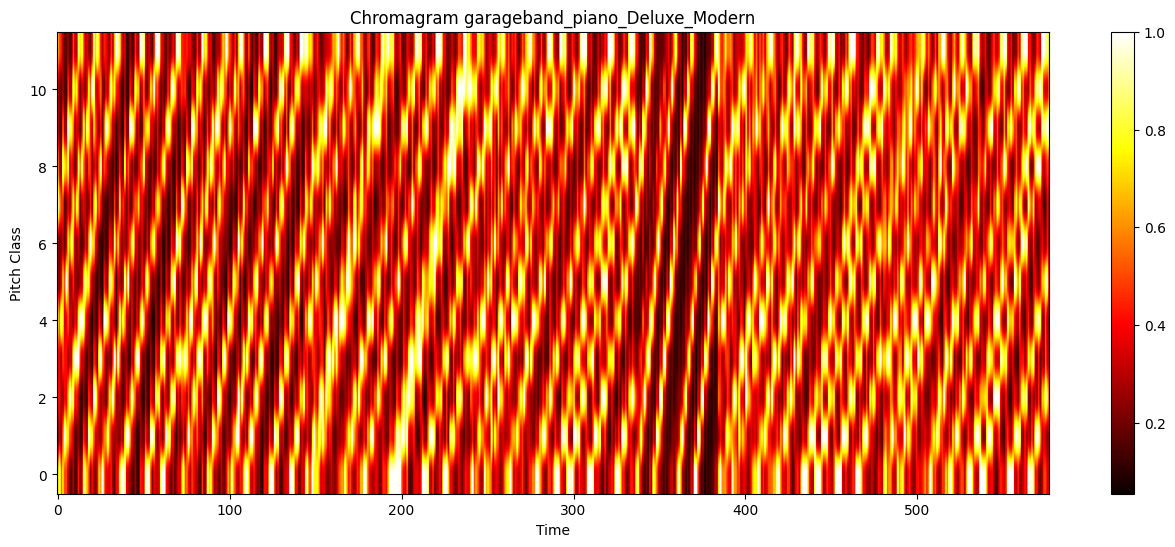

(12, 577)


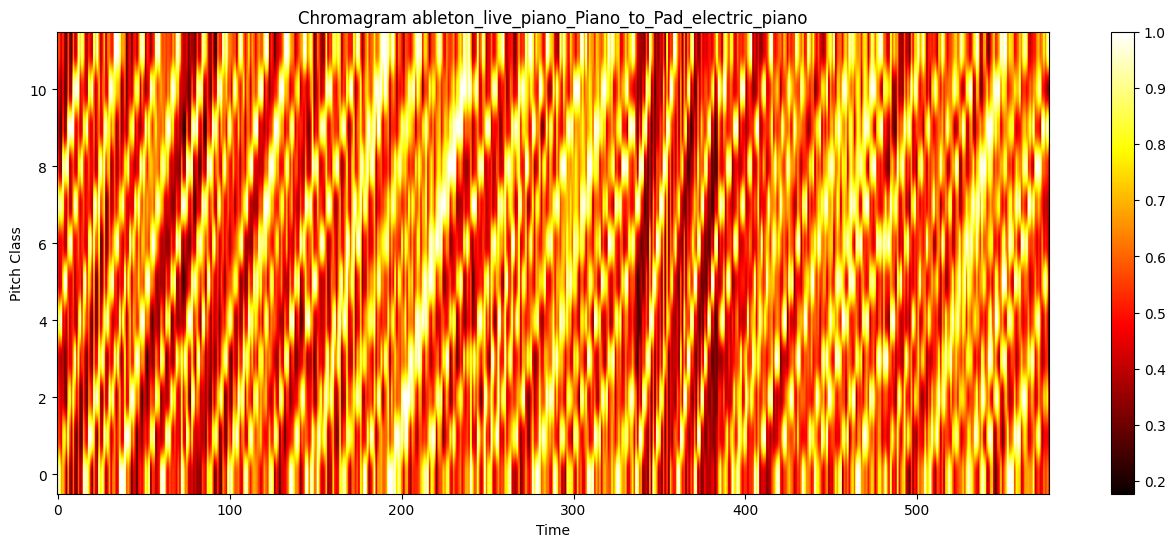

(12, 577)


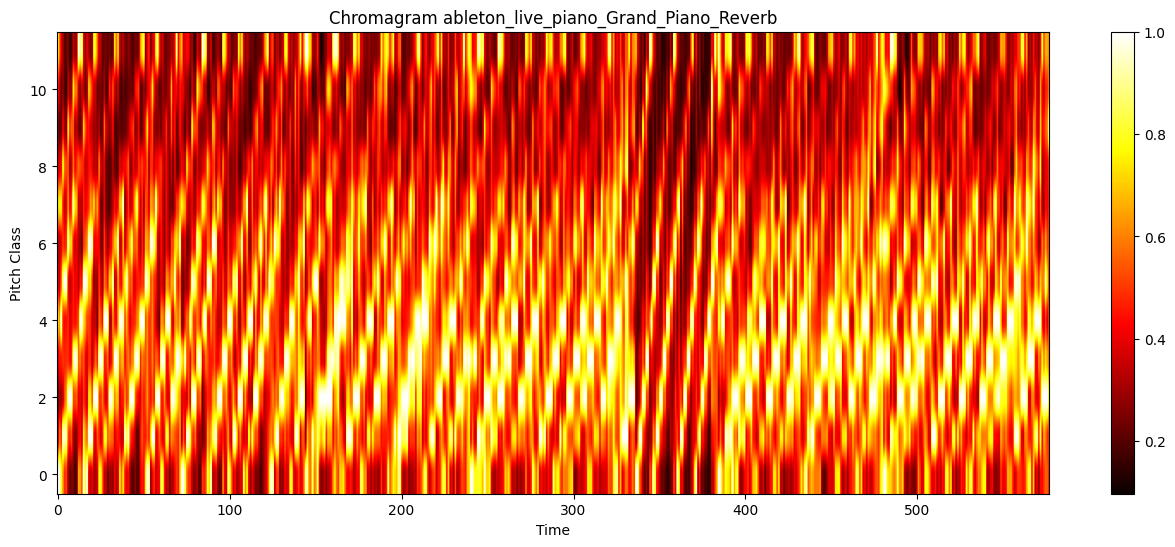

In [7]:
save = False
for dir_path, _, filenames in os.walk('IDMT-SMT-CHORDS/raw_data'):
    for file_name in filenames:
        plot_chromagram(dir_path + '/' + file_name)
        if save: 
            save_chromagram(dir_path + '/' + file_name)
        plt.show()

Las franjas negras que se ven en el chromagram se pueden (se corresponden) corresponder con los acordes de quinta -> resultado a poner en las diapositivas del eda

In [7]:
# Listen to the audio 
# ipd.Audio(audio_file)

In [8]:
n_mels = 128
n_fft = hop_length # Length of the FFT window

def plot_spectrogram(audio_file, n_mels = 128, n_fft = int(44.1e3 * 2)): 
    x, sr = librosa.load(audio_file, sr=None)
    S_mel = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    S_mel_log = librosa.power_to_db(abs(S_mel))
    librosa.display.specshow(S_mel_log, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', fmin=0, fmax=sr/2)
    plt.title(f'Mel Spectogram {os.path.split(audio_file)[-1].split(".")[0]}')
    plt.tight_layout()
    plt.grid()
    plt.colorbar(format='%+2.0f dB')

def save_spectrogram(audio_file, n_mels = 128, n_fft = int(44.1e3 * 2)):
    x, sr = librosa.load(audio_file, sr=None)
    S_mel = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    S_mel_log = librosa.power_to_db(abs(S_mel))
    np.save(os.path.split('IDMT-SMT-CHORDS/spectrograms/'+ audio_file)[-1].split(".")[0] + "_spectrogram.npy", S_mel_log)

In [ ]:
from tqdm import tqdm   

for dir_path, _, filenames in os.walk('IDMT-SMT-CHORDS/raw_data'):
    for file_name in tqdm(filenames):
        plot_spectrogram(dir_path + '/' + file_name)
        if save:
            save_spectrogram(dir_path + '/' + file_name)    
        plt.show()